In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

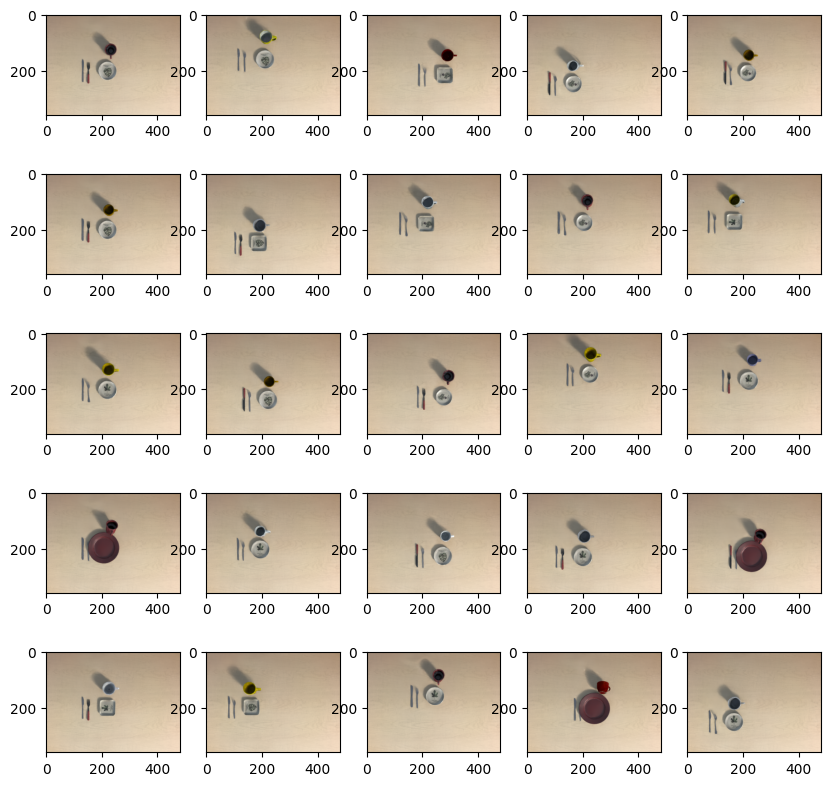

In [19]:
fig, axes = plt.subplots(5,5)
fig.set_figheight(10)
fig.set_figwidth(10)

data_dir = '/ssd/disk/TableTidyingUp/dataset_sample/train/D5/template_00002'
traj_list = sorted(os.listdir(data_dir))
for i, traj in enumerate(traj_list):
    fname = os.path.join(data_dir, traj, '000', 'rgb_top.png')
    img = np.array(Image.open(fname))
    iy = i//5
    ix = i%5
    axes[iy, ix].imshow(img)
plt.show()

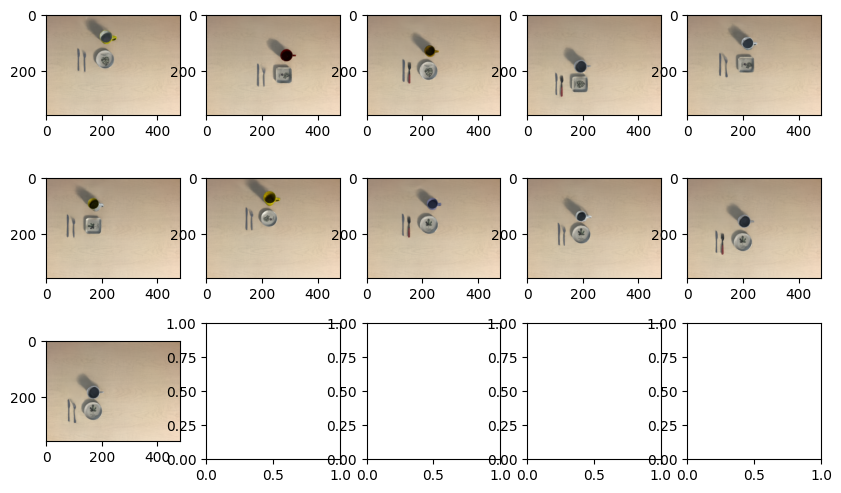

In [25]:
fig, axes = plt.subplots(3,5)
fig.set_figheight(6)
fig.set_figwidth(10)

data_dir = '/ssd/disk/TableTidyingUp/dataset_sample/train/D5/template_00002'
traj_list = sorted(os.listdir(data_dir))
for i, traj_id in enumerate([1, 2, 5, 6, 7, 9, 13, 14, 16, 18, 24]):
    fname = os.path.join(data_dir, 'traj_%05d'%traj_id, '000', 'rgb_top.png')
    img = np.array(Image.open(fname))
    iy = i//5
    ix = i%5
    axes[iy, ix].imshow(img)
plt.show()

In [9]:
os.listdir('/ssd/disk/TableTidyingUp/dataset_sample/train/D5/template_00002/traj_00001/001')

['rgb_top.png',
 'seg_front_top.npy',
 'depth_front_top.npy',
 'obj_info.json',
 'depth_top.npy',
 'rgb_front_top.png',
 'seg_top.npy']

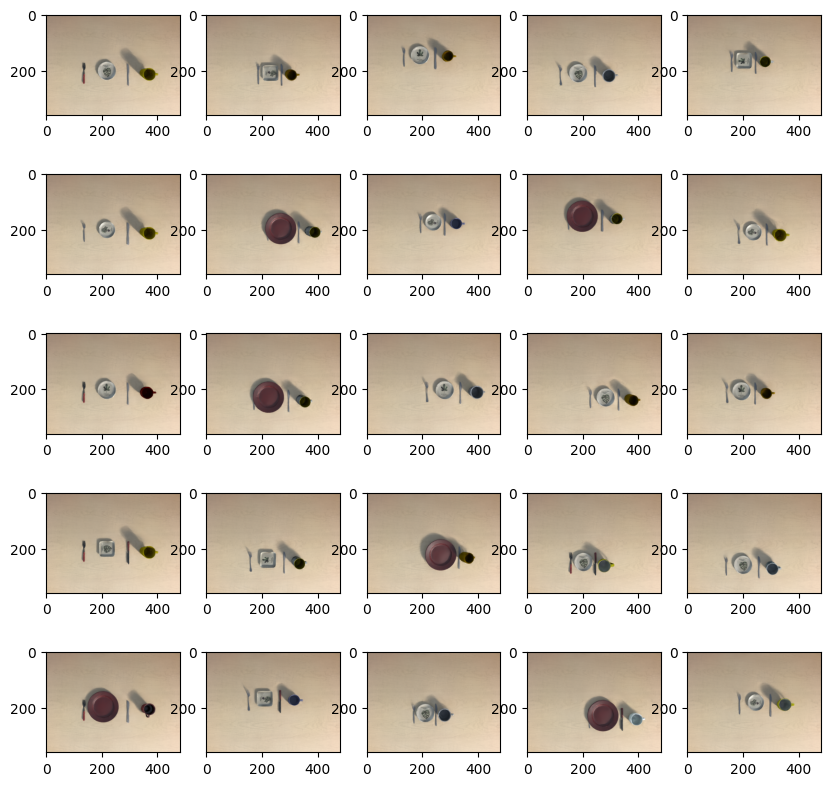

In [26]:
fig, axes = plt.subplots(5,5)
fig.set_figheight(10)
fig.set_figwidth(10)

data_dir = '/ssd/disk/TableTidyingUp/dataset_sample/train/D5/template_00007'
traj_list = sorted(os.listdir(data_dir))
for i, traj in enumerate(traj_list):
    fname = os.path.join(data_dir, traj, '000', 'rgb_top.png')
    img = np.array(Image.open(fname))
    iy = i//5
    ix = i%5
    axes[iy, ix].imshow(img)
plt.show()

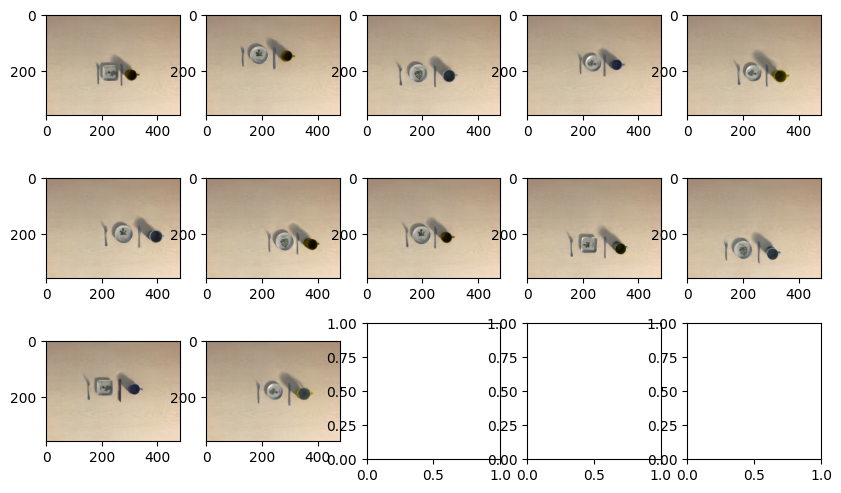

In [27]:
fig, axes = plt.subplots(3,5)
fig.set_figheight(6)
fig.set_figwidth(10)

data_dir = '/ssd/disk/TableTidyingUp/dataset_sample/train/D5/template_00007'
traj_list = sorted(os.listdir(data_dir))
for i, traj_id in enumerate([1, 2, 3, 7, 9, 12, 13, 14, 16, 19, 21, 24]):
    fname = os.path.join(data_dir, 'traj_%05d'%traj_id, '000', 'rgb_top.png')
    img = np.array(Image.open(fname))
    iy = i//5
    ix = i%5
    axes[iy, ix].imshow(img)
plt.show()

In [6]:
import sys
sys.path.append('../realrobot')

In [7]:
from utils_gsam import *

In [ ]:
GSAM = GroundedSAM('/home/gun/Desktop/Grounded-Segment-Anything/')

/home/gun/anaconda3/envs/diffuser/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from data_loader import TabletopTemplateDataset
from torch.utils.data import DataLoader

In [2]:
from PIL import Image

In [3]:
x = np.array(Image.open('/home/gun/Downloads/input_image.jpg'))
x2 = np.array(Image.open('/home/gun/Downloads/input_image2.jpg'))

In [4]:
image = cv2.cvtColor(x2.astype(np.uint8), cv2.COLOR_RGB2BGR)
classes = ['banana', 'apple', 'orange', 'plate', 'bowl']
detection = GSAM.get_masks(image, classes)

NameError: name 'cv2' is not defined

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(x)
plt.axis('off')
plt.show()  

NameError: name 'detection' is not defined

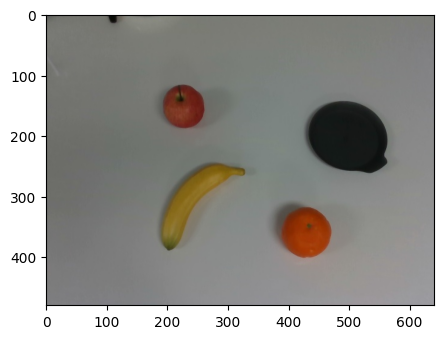

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(x2)
np.random.seed(18) #18
for mask in detection.mask[:4]:
    show_mask(mask, plt.gca(), random_color=True)
plt.axis('off')
plt.show()  

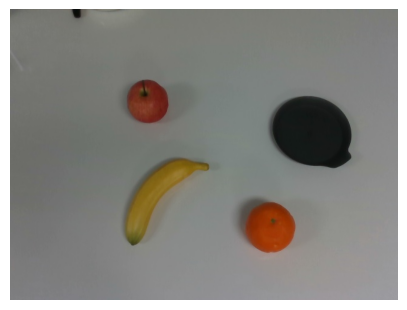

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(x2)
plt.axis('off')
plt.show()  

In [100]:
data_path = '/ssd/disk/TableTidyingUp/dataset_template/train'
data_path = '/ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template'

dataset = TabletopTemplateDataset(data_dir=data_path, 
            remove_bg=False, label_type='linspace', view='top')
dataloader = DataLoader(dataset, batch_size=5, shuffle=False, num_workers=1)

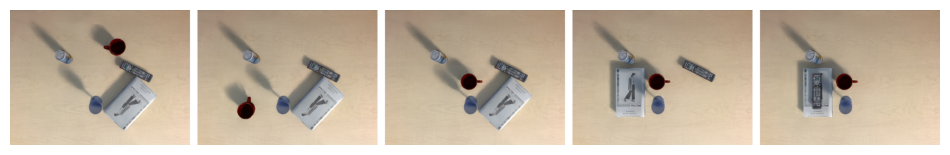

In [5]:
sidx = 5009
f = plt.figure(figsize=(12,5))
plt.axis('off')

r = np.ones([360, 480*5 + 80, 3])
for idx in range(5): #sidx*5, sidx*5+5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[:, (4-idx)*500:(4-idx)*500+480] = x
plt.imshow(r)
plt.show()

In [101]:
for i, dp in enumerate(dataset.data_paths):
    if 'D5/' in dp:
        print(i, dp)

4750 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00000/000
4751 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00000/001
4752 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00000/002
4753 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00000/003
4754 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00000/004
4755 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00001/000
4756 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00001/001
4757 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00001/002
4758 /ssd/disk/TableTidyingUp/dataset_template/test-unseen_obj-unseen_template/D5/template_00001/traj_00

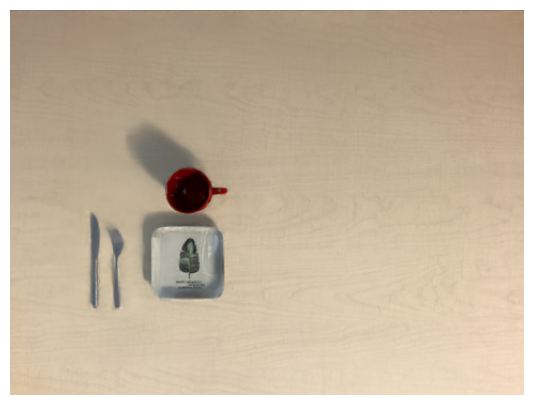

In [142]:
sidx = 999

f = plt.figure(figsize=(10,5))
plt.axis('off')
x, y = dataset.__getitem__(sidx*5)
x = x.detach().cpu().numpy().transpose([1,2,0])
plt.imshow(x)
plt.show()

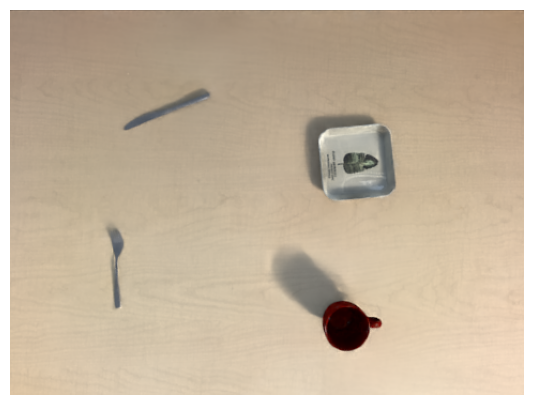

In [144]:
sidx = 999

f = plt.figure(figsize=(10,5))
plt.axis('off')
x, y = dataset.__getitem__(sidx*5+4)
x = x.detach().cpu().numpy().transpose([1,2,0])
plt.imshow(x)
plt.show()

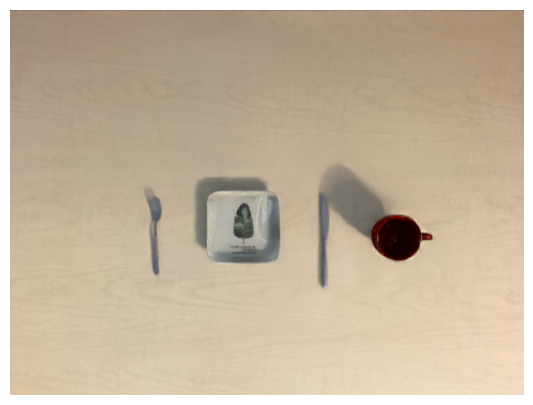

In [143]:
sidx = 1120

f = plt.figure(figsize=(10,5))
plt.axis('off')
x, y = dataset.__getitem__(sidx*5)
x = x.detach().cpu().numpy().transpose([1,2,0])
plt.imshow(x)
plt.show()

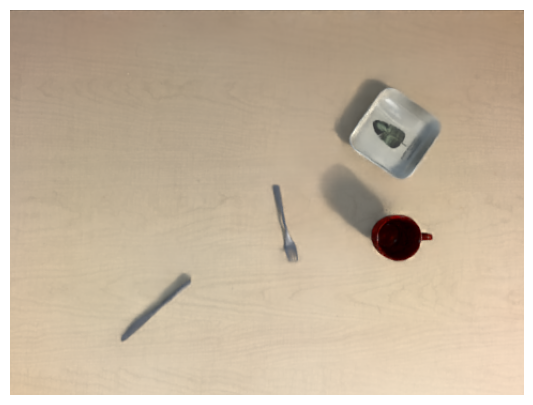

In [145]:
sidx = 1120

f = plt.figure(figsize=(10,5))
plt.axis('off')
x, y = dataset.__getitem__(sidx*5+4)
x = x.detach().cpu().numpy().transpose([1,2,0])
plt.imshow(x)
plt.show()

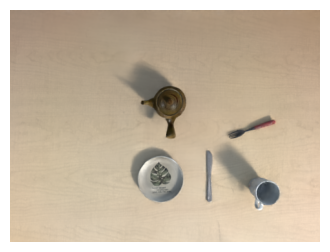

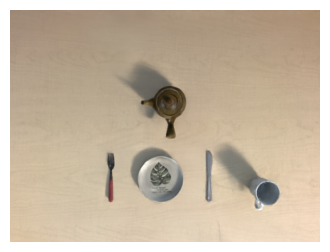

In [139]:
x, y = dataset.__getitem__(12100*5+2)
x = x.detach().cpu().numpy().transpose([1,2,0])

f = plt.figure(figsize=(4,4))
plt.axis('off')
plt.imshow(x)
plt.show()

x2, y2 = dataset.__getitem__(12100*5+1)
x2 = x2.detach().cpu().numpy().transpose([1,2,0])

f = plt.figure(figsize=(4,4))
plt.axis('off')
plt.imshow(x2)
plt.show()

In [140]:
image = cv2.cvtColor((x*255).astype(np.uint8), cv2.COLOR_RGB2BGR)
classes = ['book', 'remote', 'cup', 'can', 'mug', 'fork', 'knife', 'teapot', 'plate']
detection = GSAM.get_masks(image, classes)

Before NMS: 5 boxes
After NMS: 5 boxes


In [6]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

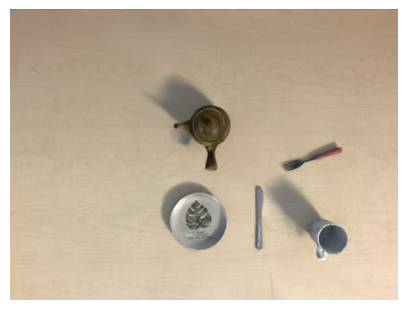

In [142]:
plt.figure(figsize=(5,5))
plt.imshow(x)
plt.axis('off')
plt.show()  

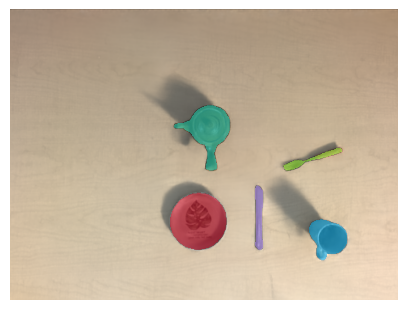

In [179]:
plt.figure(figsize=(5,5))
plt.imshow(x)
np.random.seed(18) #7
for mask in detection.mask:
    show_mask(mask, plt.gca(), random_color=True)
plt.axis('off')
plt.show()  

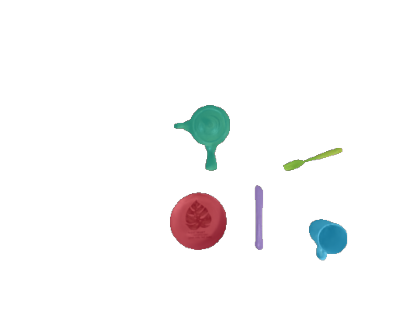

In [181]:
plt.figure(figsize=(5,5))
np.random.seed(18) #7
m = np.sum(detection.mask, 0).astype(bool).astype(float)[:, :, None]
plt.imshow(x*m + np.ones_like(x)*(1-m))#*0.8)
for mask in detection.mask:
    show_mask(mask, plt.gca(), random_color=True)
plt.axis('off')
plt.show()  

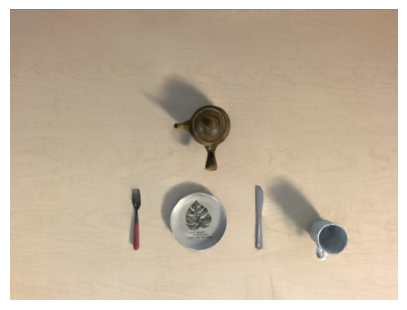

In [148]:
plt.figure(figsize=(5,5))
plt.imshow(x2)
plt.axis('off')
plt.show()  

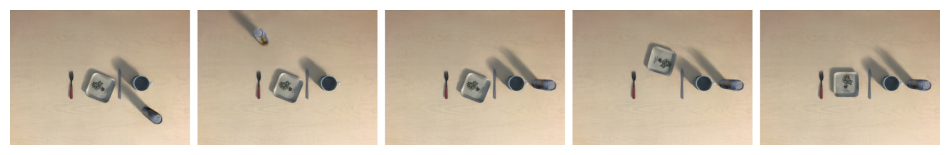

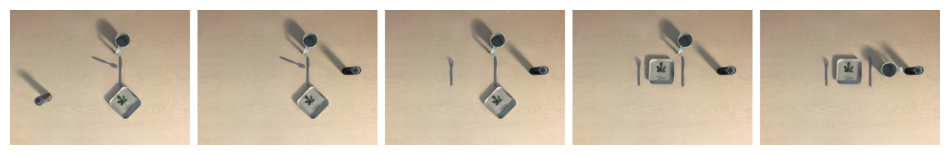

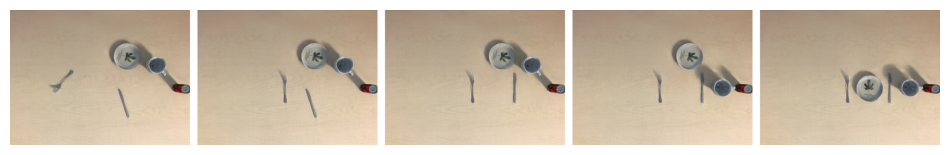

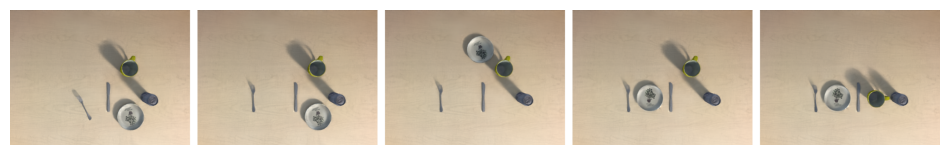

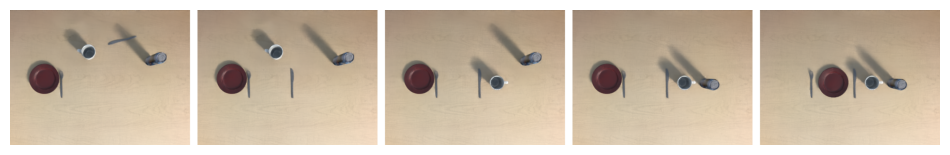

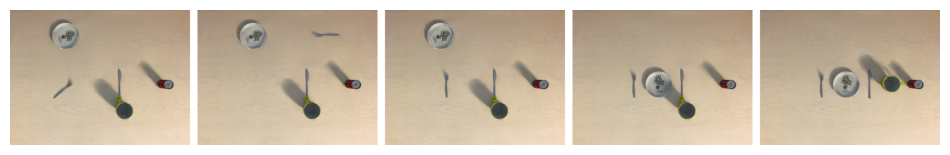

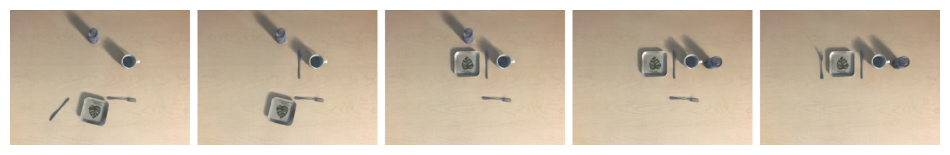

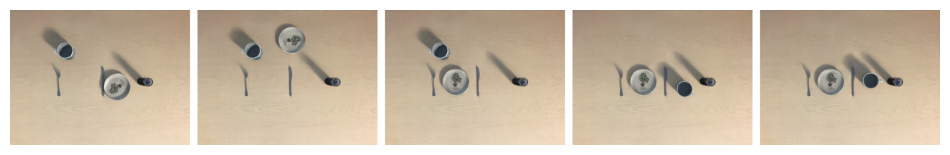

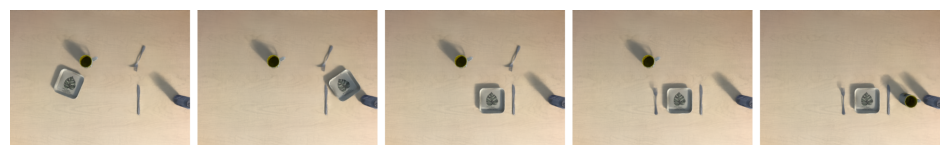

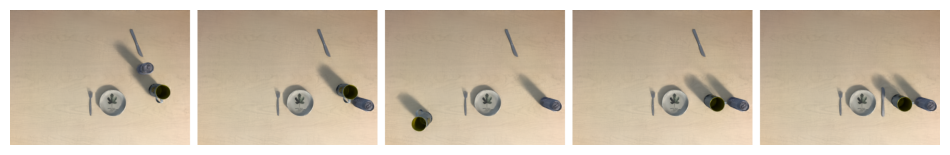

In [327]:
for sidx in range(12340,12350): #12100
    f = plt.figure(figsize=(12,5))
    plt.axis('off')

    r = np.ones([360, 480*5 + 80, 3])
    for idx in range(5): #sidx*5, sidx*5+5):
        x, y = dataset.__getitem__(sidx*5 + idx)
        x = x.detach().cpu().numpy().transpose([1,2,0])
        r[:, (4-idx)*500:(4-idx)*500+480] = x
    plt.imshow(r)
    plt.show()

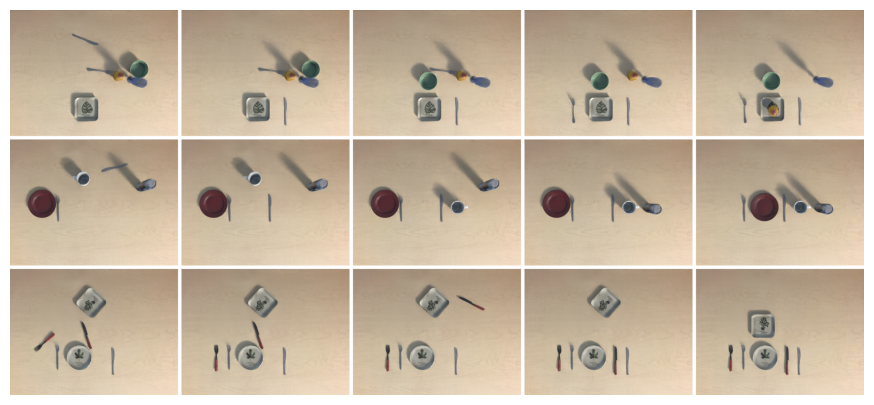

In [328]:
f = plt.figure(figsize=(12,5))
plt.axis('off')

r = np.ones([360*3 + 20, 480*5 + 40, 3])
sidx = 9023 #9021
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[:360, (4-idx)*490:(4-idx)*490+480] = x


sidx = 12344 #11320 #9023
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[360+10:360*2+10, (4-idx)*490:(4-idx)*490+480] = x
    
sidx = 10322
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[360*2+20:360*3+20, (4-idx)*490:(4-idx)*490+480] = x


plt.imshow(r)
plt.show()


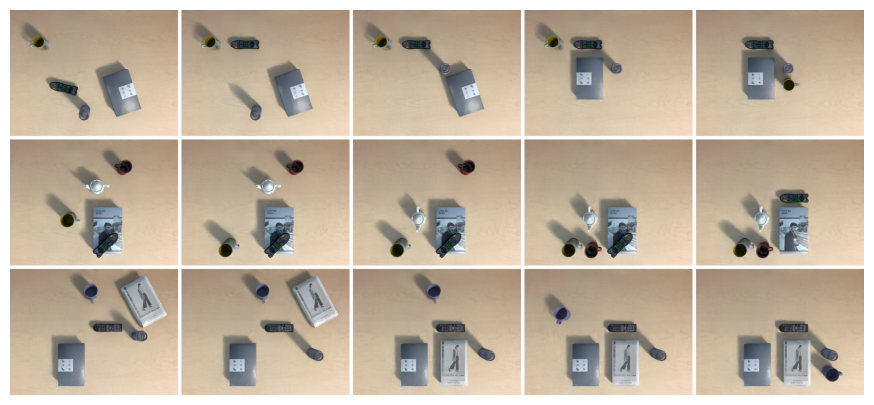

In [314]:
f = plt.figure(figsize=(12,5))
plt.axis('off')

r = np.ones([360*3 + 20, 480*5 + 40, 3])
sidx = 4400
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[:360, (4-idx)*490:(4-idx)*490+480] = x


sidx = 7528 #6571
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[360+10:360*2+10, (4-idx)*490:(4-idx)*490+480] = x
    
sidx = 8207 #8200 #6526 #6000 #6005
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[360*2+20:360*3+20, (4-idx)*490:(4-idx)*490+480] = x


plt.imshow(r)
plt.show()


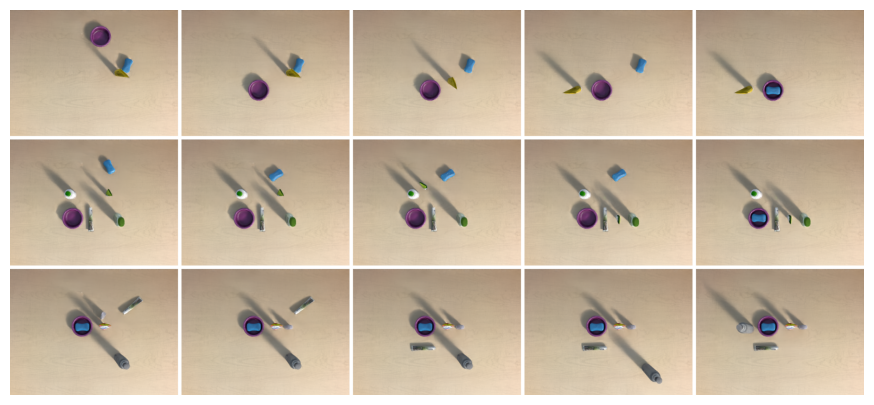

In [250]:
f = plt.figure(figsize=(12,5))
plt.axis('off')

r = np.ones([360*3 + 20, 480*5 + 40, 3])
sidx = 42
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[:360, (4-idx)*490:(4-idx)*490+480] = x

sidx = 505
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[360+10:360*2+10, (4-idx)*490:(4-idx)*490+480] = x

sidx = 1123
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[360*2+20:360*3+20, (4-idx)*490:(4-idx)*490+480] = x

plt.imshow(r)
plt.show()


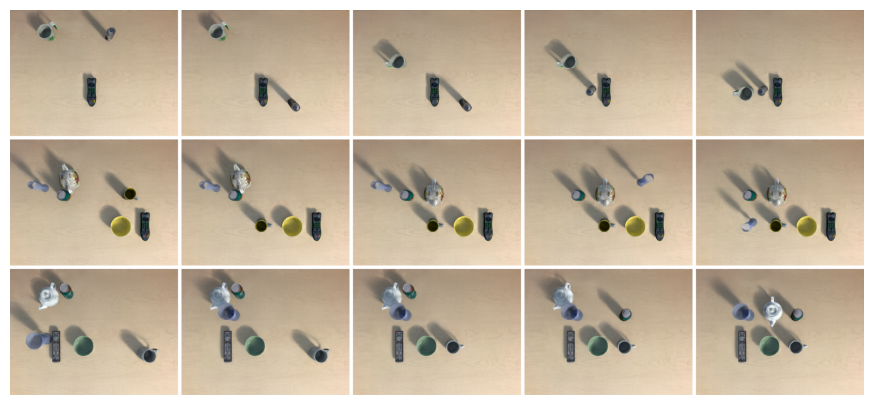

In [271]:
f = plt.figure(figsize=(12,5))
plt.axis('off')

r = np.ones([360*3 + 20, 480*5 + 40, 3])
sidx = 2140
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[:360, (4-idx)*490:(4-idx)*490+480] = x

sidx = 2655 #2652
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[360+10:360*2+10, (4-idx)*490:(4-idx)*490+480] = x

sidx = 2846
for idx in range(5):
    x, y = dataset.__getitem__(sidx*5 + idx)
    x = x.detach().cpu().numpy().transpose([1,2,0])
    r[360*2+20:360*3+20, (4-idx)*490:(4-idx)*490+480] = x

plt.imshow(r)
plt.show()


In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
data_dir = '/ssd/disk/ur5_tidying_data/pybullet_single_bg/images'
seg_list = sorted([os.path.join(data_dir, s) for s in os.listdir(data_dir) if s.startswith('seg_')])
rgb_list = sorted([os.path.join(data_dir, r) for r in os.listdir(data_dir) if r.startswith('rgb_')])

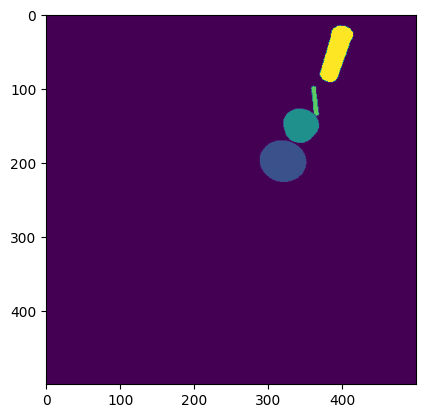

In [3]:
seg0 = np.flip(np.load(seg_list[0]), 0)
plt.imshow(seg0)

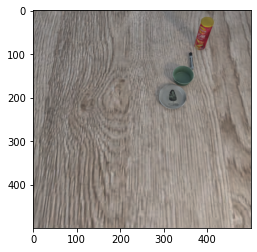

In [133]:
rgb0 = np.array(Image.open(rgb_list[0]))
plt.imshow(rgb0)

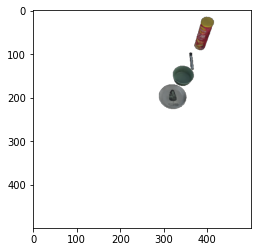

In [134]:
plt.imshow(rgb0 * (seg0!=0).reshape(500, 500, 1))

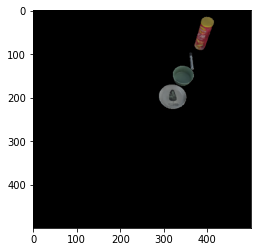

In [135]:
plt.imshow((rgb0 * (seg0!=0).reshape(500, 500, 1))[:, :, :3])

In [136]:
py, px = np.where(seg0==2)

In [137]:
min_y, max_y = np.min(py), np.max(py)
min_x, max_x = np.min(px), np.max(px)

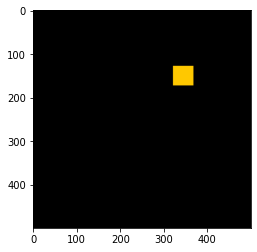

In [138]:
empty = np.zeros_like(rgb0[:, :, :3])
empty[min_y:max_y, min_x:max_x] = [255, 200, 0]
plt.imshow(empty)

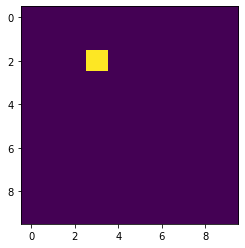

In [139]:
empty = np.zeros([10, 10])
empty[2, 3] = 1
plt.imshow(empty)

In [140]:
py, px = np.where(seg0==1)
cy, cx = np.mean(py), np.mean(px)

In [141]:
im0 = Image.open(rgb_list[0])
im1 = Image.open(rgb_list[10])
mask0 = Image.fromarray(255 * (seg0==1).astype(np.uint8))

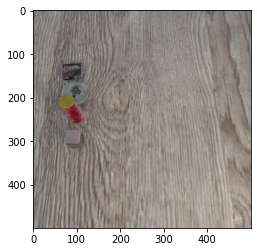

In [142]:
t = np.round(np.array([100, 400]) - [cx, cy]).astype(int)
im1.paste(im0, (t[1], t[0]), mask0)
plt.imshow(np.array(im1))

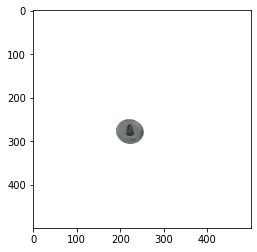

In [147]:
im2 = Image.fromarray(np.zeros_like(rgb0))
t = np.round(np.array([400, 100]) - [cx, cy]).astype(int)
im2.paste(im0, (t[1], t[0]), mask0)
plt.imshow(np.array(im2))